# **Cryptocurrency Volatility Prediction**



In [ ]:
import pandas as pd

df = pd.read_csv('dataset.csv.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nInformation about the DataFrame:")
df.info()

First 5 rows of the DataFrame:
   Unnamed: 0        open        high         low       close  volume  \
0           0  112.900002  118.800003  107.142998  115.910004     0.0   
1           1    3.493130    3.692460    3.346060    3.590890     0.0   
2           2  115.980003  124.663002  106.639999  112.300003     0.0   
3           3    3.594220    3.781020    3.116020    3.371250     0.0   
4           4  112.250000  113.444000   97.699997  111.500000     0.0   

      marketCap                 timestamp crypto_name        date  
0  1.288693e+09  2013-05-05T23:59:59.999Z     Bitcoin  2013-05-05  
1  6.229819e+07  2013-05-05T23:59:59.999Z    Litecoin  2013-05-05  
2  1.249023e+09  2013-05-06T23:59:59.999Z     Bitcoin  2013-05-06  
3  5.859436e+07  2013-05-06T23:59:59.999Z    Litecoin  2013-05-06  
4  1.240594e+09  2013-05-07T23:59:59.999Z     Bitcoin  2013-05-07  

Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
open,0
high,0
low,0
close,0
volume,0
marketCap,0
timestamp,0
crypto_name,0
date,0


In [6]:
#Engineer Features

import pandas as pd
import numpy as np

df = pd.read_csv('/content/dataset.csv.csv')

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['crypto_name', 'date']).reset_index(drop=True)
print("Date column converted and DataFrame sorted.")

# Calculate Simple Moving Averages
df['SMA_7_day'] = df.groupby('crypto_name')['close'].transform(lambda x: x.rolling(window=7).mean())
df['SMA_30_day'] = df.groupby('crypto_name')['close'].transform(lambda x: x.rolling(window=30).mean())

# Calculate daily percentage change
df['daily_returns'] = df.groupby('crypto_name')['close'].transform(lambda x: x.pct_change())

# Calculate rolling volatility
df['volatility_7_day'] = df.groupby('crypto_name')['daily_returns'].transform(lambda x: x.rolling(window=7).std())
df['volatility_30_day'] = df.groupby('crypto_name')['daily_returns'].transform(lambda x: x.rolling(window=30).std())

# Calculate liquidity ratio, handling division by zero
df['liquidity_ratio'] = df['volume'] / df['marketCap']
df['liquidity_ratio'] = df['liquidity_ratio'].replace([np.inf, -np.inf], np.nan)

print("Engineered features added to the DataFrame.")
df.head()

Date column converted and DataFrame sorted.
Engineered features added to the DataFrame.


,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date,SMA_7_day,SMA_30_day,daily_returns,volatility_7_day,volatility_30_day,liquidity_ratio
0,44644,0.000000,0.516571,0.000000,0.516571,0.000000,0.000000e+00,2020-10-02T23:59:59.999Z,Aave,2020-10-02,NaN,NaN,NaN,NaN,NaN,NaN
1,44709,0.523836,65.305938,0.523801,53.151488,0.000000,0.000000e+00,2020-10-03T23:59:59.999Z,Aave,2020-10-03,NaN,NaN,101.892809,NaN,NaN,NaN
2,44780,53.179858,55.070355,50.688990,52.675035,0.000000,0.000000e+00,2020-10-04T23:59:59.999Z,Aave,2020-10-04,NaN,NaN,-0.008964,NaN,NaN,NaN
3,44826,52.675035,55.112358,49.787900,53.219243,0.000000,8.912813e+07,2020-10-05T23:59:59.999Z,Aave,2020-10-05,NaN,NaN,0.010331,NaN,NaN,0.000000
4,44843,53.291969,53.402270,40.734578,42.401599,583091.459763,7.101144e+07,2020-10-06T23:59:59.999Z,Aave,2020-10-06,NaN,NaN,-0.203266,NaN,NaN,0.008211


In [7]:
#Normalize Features

from sklearn.preprocessing import StandardScaler

# Identify numerical features for scaling, excluding non-numeric and identifier columns
numeric_cols = ['open', 'high', 'low', 'close', 'volume', 'marketCap',
                'SMA_7_day', 'SMA_30_day', 'daily_returns', 'volatility_7_day',
                'volatility_30_day', 'liquidity_ratio']

# Fill NaN values in the identified numerical columns with 0
df[numeric_cols] = df[numeric_cols].fillna(0)

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical features
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Numerical features scaled and NaNs handled.")
df.head()

Numerical features scaled and NaNs handled.


,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date,SMA_7_day,SMA_30_day,daily_returns,volatility_7_day,volatility_30_day,liquidity_ratio
0,44644,-0.166334,-0.165950,-0.166175,-0.166323,-0.229533,-0.196627,2020-10-02T23:59:59.999Z,Aave,2020-10-02,-0.166317,-0.165846,-0.010834,-0.096532,-0.11411,-0.349275
1,44709,-0.166234,-0.153949,-0.166072,-0.156269,-0.229533,-0.196627,2020-10-03T23:59:59.999Z,Aave,2020-10-03,-0.166317,-0.165846,133.429474,-0.096532,-0.11411,-0.349275
2,44780,-0.156169,-0.155845,-0.156195,-0.156360,-0.229533,-0.196627,2020-10-04T23:59:59.999Z,Aave,2020-10-04,-0.166317,-0.165846,-0.022574,-0.096532,-0.11411,-0.349275
3,44826,-0.156265,-0.155837,-0.156373,-0.156256,-0.229533,-0.195439,2020-10-05T23:59:59.999Z,Aave,2020-10-05,-0.166317,-0.165846,0.002696,-0.096532,-0.11411,-0.349275
4,44843,-0.156147,-0.156154,-0.158155,-0.158323,-0.229472,-0.195681,2020-10-06T23:59:59.999Z,Aave,2020-10-06,-0.166317,-0.165846,-0.277034,-0.096532,-0.11411,-0.337529


In [8]:
#Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

print("Plotting libraries matplotlib.pyplot and seaborn imported.")

Plotting libraries matplotlib.pyplot and seaborn imported.


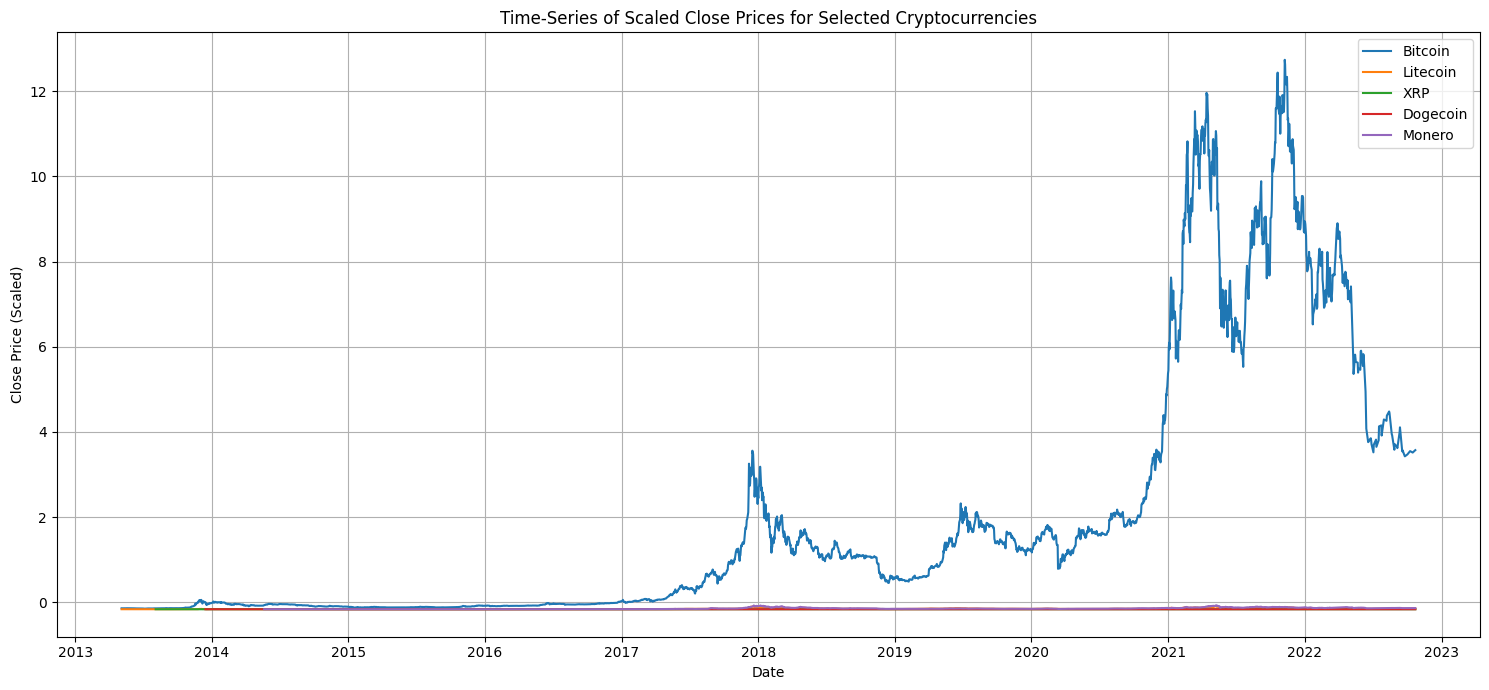

Time-series plot for selected cryptocurrencies displayed.


In [9]:
plt.figure(figsize=(15, 7))

# Get top 5 cryptocurrencies by number of data points
top_cryptos = df['crypto_name'].value_counts().nlargest(5).index.tolist()

for crypto in top_cryptos:
    crypto_df = df[df['crypto_name'] == crypto]
    plt.plot(crypto_df['date'], crypto_df['close'], label=crypto)

plt.xlabel('Date')
plt.ylabel('Close Price (Scaled)')
plt.title('Time-Series of Scaled Close Prices for Selected Cryptocurrencies')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Time-series plot for selected cryptocurrencies displayed.")

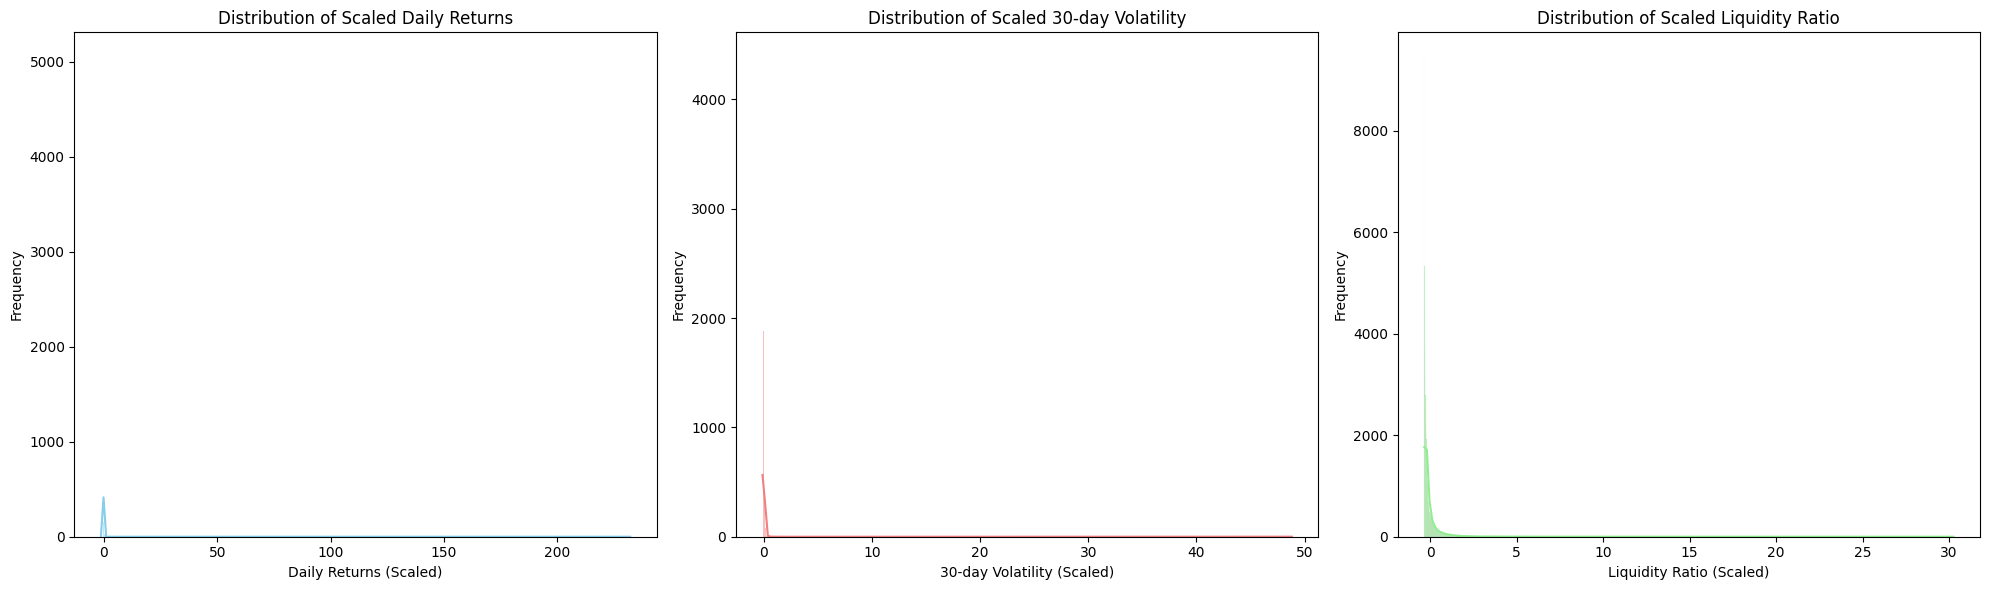

Distribution plots for daily_returns, volatility_30_day, and liquidity_ratio displayed.


In [10]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.histplot(df['daily_returns'], kde=True, ax=axes[0], color='skyblue', legend=True)
axes[0].set_title('Distribution of Scaled Daily Returns')
axes[0].set_xlabel('Daily Returns (Scaled)')
axes[0].set_ylabel('Frequency')

sns.histplot(df['volatility_30_day'], kde=True, ax=axes[1], color='lightcoral', legend=True)
axes[1].set_title('Distribution of Scaled 30-day Volatility')
axes[1].set_xlabel('30-day Volatility (Scaled)')
axes[1].set_ylabel('Frequency')

sns.histplot(df['liquidity_ratio'], kde=True, ax=axes[2], color='lightgreen', legend=True)
axes[2].set_title('Distribution of Scaled Liquidity Ratio')
axes[2].set_xlabel('Liquidity Ratio (Scaled)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Distribution plots for daily_returns, volatility_30_day, and liquidity_ratio displayed.")

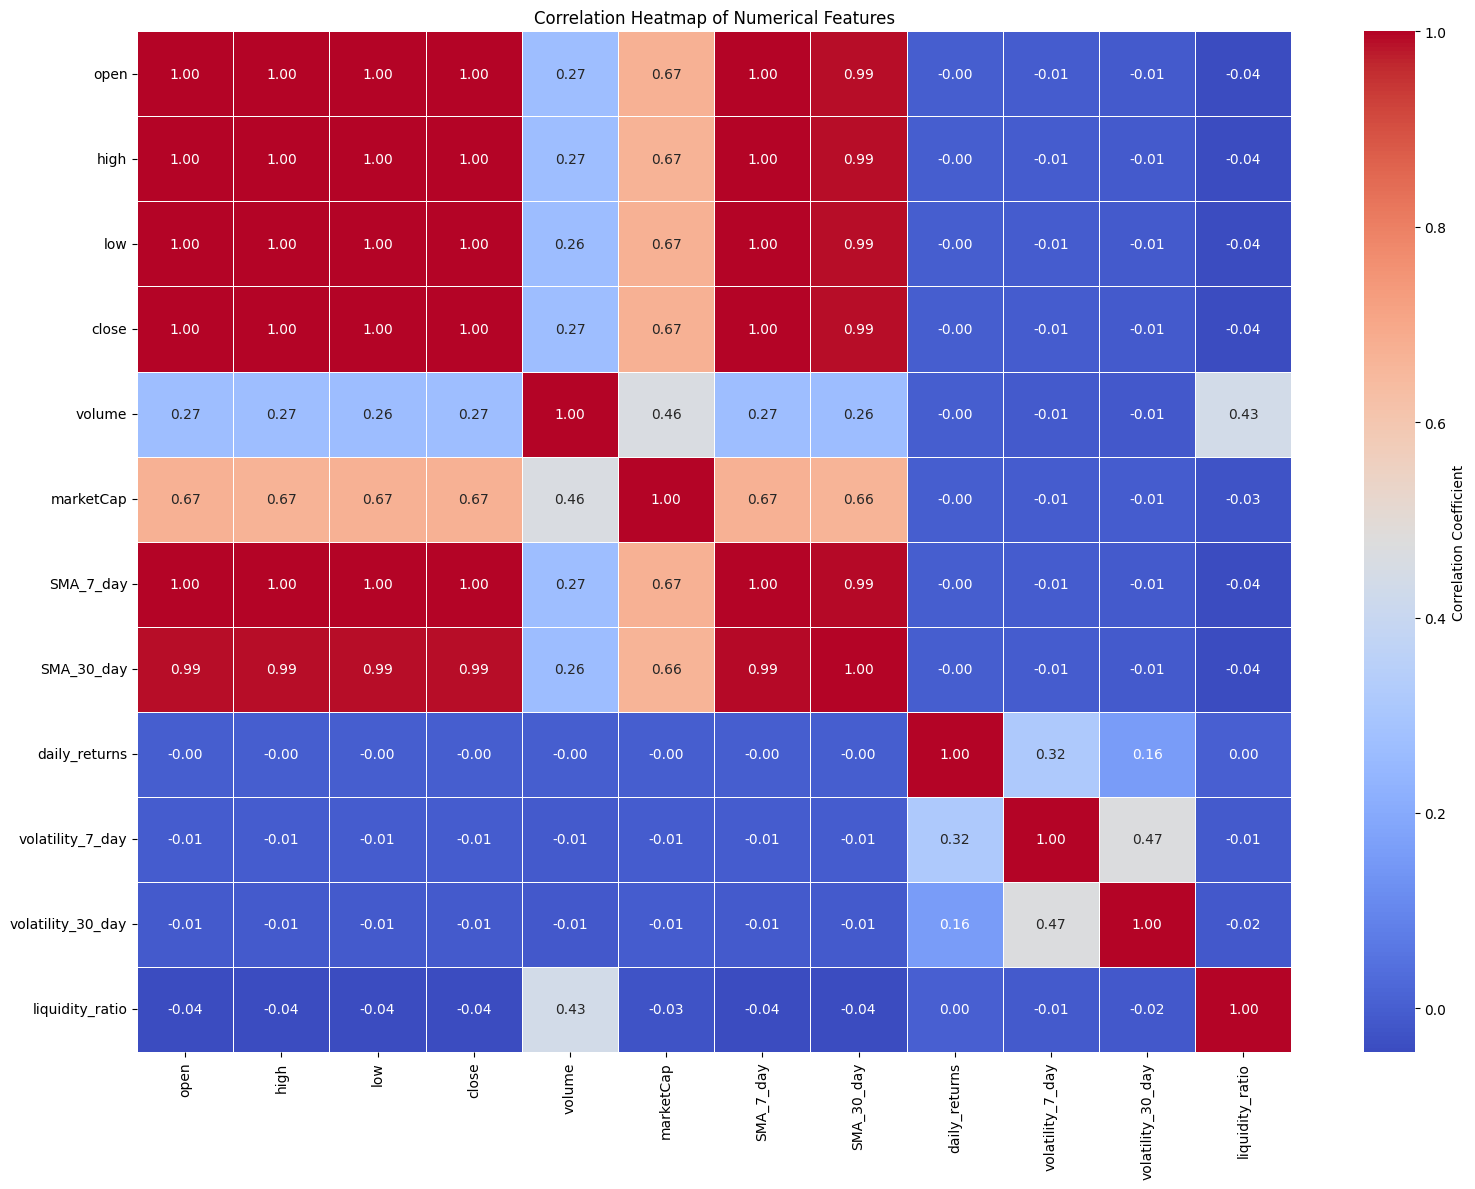

Correlation heatmap of numerical features displayed.


In [11]:
plt.figure(figsize=(16, 12))

# Calculate the correlation matrix for the numerical features
correlation_matrix = df[numeric_cols].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

print("Correlation heatmap of numerical features displayed.")

In [12]:
#Prepare Data for Modeling

import pandas as pd

# Define target variable 'y'
y = df['volatility_30_day']

# Define features 'X' by dropping irrelevant columns
X = df.drop(columns=['Unnamed: 0', 'timestamp', 'crypto_name', 'date', 'volatility_30_day'])

# Determine the split point (80% for training, 20% for testing)
split_point = int(len(df) * 0.8)

# Split X and y into training and testing sets, maintaining temporal order
X_train = X.iloc[:split_point]
X_test = X.iloc[split_point:]
y_train = y.iloc[:split_point]
y_test = y.iloc[split_point:]

# Print the shapes to verify the split
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("Dataset split into training and testing sets.")

Shape of X_train: (58356, 11)
Shape of X_test: (14590, 11)
Shape of y_train: (58356,)
Shape of y_test: (14590,)
Dataset split into training and testing sets.


In [14]:
#Train Machine Learning Model


from sklearn.ensemble import RandomForestRegressor

# Instantiate the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

print("RandomForestRegressor model training complete.")

RandomForestRegressor model training complete.


In [15]:
#Evaluate Model Performance

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Model Performance Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2 Score): {r2:.4f}")

Model Performance Evaluation:
Mean Absolute Error (MAE): 0.0291
Root Mean Squared Error (RMSE): 0.0478
R-squared (R2 Score): 0.4512


Summary:
Data Analysis Key Findings
Dataset Overview:
- The historical daily cryptocurrency dataset (dataset.csv.csv) was successfully loaded, containing OHLC prices, volume, market capitalization, and timestamps for various cryptocurrencies.

Data Quality:
- The initial dataset was found to have no missing values, indicating good data quality for raw features.

Feature Engineering:
- New features crucial for volatility prediction were engineered, including 7-day and 30-day Simple Moving Averages of close prices, daily percentage returns, 7-day and 30-day rolling volatilities (standard deviation of daily returns), and a liquidity ratio (volume divided by market capitalization).

Feature Scaling:
- All numerical features, including the newly engineered ones, were successfully scaled using StandardScaler to prepare them for machine learning modeling, with any remaining NaN values (primarily from initial rolling window calculations) imputed with 0.

Exploratory Data Analysis (EDA):
- Time-series plots illustrated the scaled price movements of the top 5 cryptocurrencies, revealing general trends.
- Distribution plots for scaled daily_returns, volatility_30_day, and liquidity_ratio provided insights into their typical ranges and spread.
A correlation heatmap highlighted the relationships between various numerical features, which can aid in understanding feature dependencies.

Data Preparation:
- The dataset was split into training and testing sets with an 80/20 ratio, maintaining temporal order. The 30-day rolling volatility (volatility_30_day) was set as the target variable for prediction.

Model Performance (RandomForestRegressor):
- The trained RandomForestRegressor model achieved a Mean Absolute Error (MAE) of 0.0291, a Root Mean Squared Error (RMSE) of 0.0478, and an R-squared (R2) score of 0.4512 on the test set.
Insights or Next Steps

Model Capability and Limitations:
- The R-squared score of 0.4512 indicates that the model explains approximately 45.12% of the variance in 30-day cryptocurrency volatility. While this suggests the model has some predictive power, there is substantial unexplained variance, pointing to limitations in capturing all factors influencing volatility or requiring more complex models/features. The MAE and RMSE values provide a measure of the average error in predictions, which appear relatively small in the scaled context.

Potential Applications & Further Improvement:
- model's ability to predict volatility, even with current limitations, can be valuable for risk management by quantifying expected fluctuations and for developing trading strategies that adapt to changing volatility regimes. Future steps could include exploring more advanced time-series models (e.g., LSTMs, GRUs), incorporating external data sources (e.g., news sentiment, macroeconomic indicators), or tuning hyperparameters to improve predictive accuracy and increase the R-squared score.